<a href="https://colab.research.google.com/github/ranjita782/python-projects/blob/main/loantap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:04<00:00, 21.3MB/s] 


In [ ]:
#Header files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import gdown as gd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [ ]:
# Import the dataset
data = pd.read_csv('logistic_regression.csv')

In [ ]:
# Example of imputation for emp_title
data['emp_title'].fillna('Unknown', inplace=True)

data['emp_length'].fillna('Unknown', inplace=True)


In [ ]:
data['revol_util'].fillna(data['revol_util'].median(), inplace=True)


In [ ]:
# Example of correlation-based imputation
total_acc_avg = data.groupby('total_acc')['mort_acc'].mean()
data['mort_acc'] = data.apply(lambda x: total_acc_avg[x['total_acc']] if pd.isnull(x['mort_acc']) else x['mort_acc'], axis=1)


In [ ]:
data['pub_rec_bankruptcies'].fillna(0, inplace=True)


In [ ]:
data['mort_acc_missing'] = data['mort_acc'].isnull().astype(int)


In [ ]:
# Example of one-hot encoding
data = pd.get_dummies(data, columns=['term', 'grade', 'sub_grade', 'home_ownership'], drop_first=True)

# Example of scaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
data[numeric_features] = scaler.fit_transform(data[numeric_features])


In [ ]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['issue_year'] = data['issue_d'].dt.year
data['issue_month'] = data['issue_d'].dt.month


In [ ]:
data = pd.get_dummies(data, columns=['purpose'], drop_first=True)


In [ ]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
data['credit_age'] = (data['issue_d'] - data['earliest_cr_line']).dt.days // 30  # in months


In [ ]:
data['initial_list_status'] = data['initial_list_status'].map({'w': 0, 'f': 1})


In [ ]:
data['zip_code'] = data['address'].apply(lambda x: x[-5:])  # Assuming ZIP is the last 5 characters
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Exclude non-numeric columns
non_numeric_columns = data.columns.difference(numeric_columns)

# Option 1: Scale only the numeric columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_columns])

# Convert back to a DataFrame and retain non-numeric columns
data_scaled_df = pd.DataFrame(data_scaled, columns=numeric_columns)
final_data = pd.concat([data_scaled_df, data[non_numeric_columns].reset_index(drop=True)], axis=1)

# Option 2: If you want to retain non-numeric columns unchanged
# You might prefer to scale only numeric columns and then concatenate with the rest


In [ ]:
# Example of encoding (if grouping or simplification is not performed):
data['emp_title'] = data['emp_title'].astype('category').cat.codes


In [ ]:
mode_imputer = SimpleImputer(strategy='most_frequent')
data['emp_length'] = mode_imputer.fit_transform(data[['emp_length']]).astype(str)
data['title'] = mode_imputer.fit_transform(data[['title']]).astype(str)


In [ ]:
title_counts = data['title'].value_counts()
data['title_encoded'] = data['title'].map(title_counts)


In [ ]:
# Map loan_status to numeric values
data['loan_status'] = data['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})


In [ ]:
# Compute the mean of the target variable for each title
target_mean = data.groupby('title')['loan_status'].mean()


# Map these means to the original data
data['title'] = data['title'].map(target_mean)


In [ ]:
# Assuming `loan_status` has already been converted to numeric (0 and 1)
emp_title_mean = data.groupby('emp_title')['loan_status'].mean()
data['emp_title'] = data['emp_title'].map(emp_title_mean)


In [ ]:
# Frequency encoding
emp_title_freq = data['emp_title'].value_counts(normalize=True)
data['emp_title'] = data['emp_title'].map(emp_title_freq)


In [ ]:
data = data.drop(['address'], axis=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the application_type column
data['application_type'] = label_encoder.fit_transform(data['application_type'])




In [ ]:
# Extracting features from datetime columns
data['issue_year'] = data['issue_d'].dt.year
data['issue_month'] = data['issue_d'].dt.month

# Drop original datetime column if not needed
data = data.drop(columns=['issue_d'])


In [ ]:
# Extracting features from datetime columns
data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year
data['earliest_cr_line_month'] = data['earliest_cr_line'].dt.month
data = data.drop(columns=['earliest_cr_line'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding
data['application_type'] = label_encoder.fit_transform(data['application_type'])




In [ ]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
emp_length_mapping = {
    'Unknown': 0,
    '< 1 year': 1,
    '1 year': 2,
    '2 years': 3,
    '3 years': 4,
    '4 years': 5,
    '5 years': 6,
    '6 years': 7,
    '7 years': 8,
    '8 years': 9,
    '9 years': 10,
    '10+ years': 11
}

data['emp_length'] = data['emp_length'].map(emp_length_mapping)


In [ ]:
data['verification_status'] = data['verification_status'].map({'Not Verified': 0, 'Source Verified': 1, 'Verified': 2})

In [ ]:
missing_values = data.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])


Columns with missing values:
 Series([], dtype: int64)


In [ ]:
data.to_csv('preprocessed_data.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare features and target variable
X = data.drop(columns=['loan_status'])  # Replace 'target_column' with actual target column name
y = data['loan_status']  # Replace 'target_column' with actual target column name

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#3.a Model building using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8039416205842992
Confusion Matrix:
 [[63312   317]
 [15212   365]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89     63629
           1       0.54      0.02      0.04     15577

    accuracy                           0.80     79206
   macro avg       0.67      0.51      0.47     79206
weighted avg       0.75      0.80      0.72     79206



The model predicts all instances as class 0 (Fully Paid), resulting in zero true positives for class 1 (Charged Off). Precision, recall, and f1-score for class 1 are all zero, indicating that the model is imbalanced.

In [ ]:
#3.c.b.1 Applying SMOTE
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

In [ ]:
# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # class_weight='balanced' handles class imbalance

In [ ]:
# Fit the model on the resampled training data
rf_model.fit(X_train_res, y_train_res)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100],  # Reduced values for quicker testing
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)


In [ ]:
X_train_small = X_train.sample(n=100000, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

grid_search.fit(X_train_small, y_train_small)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   9.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   9.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   7.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   8.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   8.0s
[CV] END max_depth

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [ ]:
X_train_small = X_train.sample(n=100000, random_state=42)
y_train_small = y_train.loc[X_train_small.index]


In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9347800074868812


0.93493000358695: This score represents the cross-validated accuracy of the model using the best combination of hyperparameters found during the grid search. A score of around 0.935 is quite high, indicating that the model is performing well on the training data in a cross-validation setting.
With min_samples_leaf=1 and max_depth=None, there's a potential risk of overfitting.
Model Performance: The model seems to be well-tuned with these hyperparameters, achieving high accuracy.

In [ ]:
#3.c Adjusting class weights
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6178067318132465
Confusion Matrix:
 [[39419 24210]
 [ 6062  9515]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.62      0.72     63629
           1       0.28      0.61      0.39     15577

    accuracy                           0.62     79206
   macro avg       0.57      0.62      0.55     79206
weighted avg       0.75      0.62      0.66     79206





```
Accuracy: 61.78%
Confusion Matrix:
True Negatives (TN): 64,051
False Positives (FP): 31,388
False Negatives (FN): 7,829
True Positives (TP): 15,541


```
Classification Report:
```
Class 0 (Negative Class)

Precision: 0.89 (89%)
Recall: 0.67 (67%)
F1-Score: 0.77 (77%)

Class 1 (Positive Class)

Precision: 0.33 (33%)
Recall: 0.66 (66%)
F1-Score: 0.44 (44%)
```
Interpretation:

Improvement in Recall for Class 1: After adjusting the class weights, the model significantly improved its ability to correctly identify the positive class (from 49.09% to 66% Recall). This means it is now better at identifying the cases of interest (e.g., loan defaults).

Drop in Precision for Class 1: Precision for the positive class has decreased (from 22.76% to 33%), indicating that while the model is identifying more positives, it is also making more false positive errors.

Balanced Performance: The F1-score for Class 1 improved from 31.10% to 44%, showing a better balance between Precision and Recall.

Class 0 Performance: The performance for Class 0 (the majority class) remains relatively strong, although the Recall has decreased as the model is now paying more attention to the minority class.

```
Insights:  
Precision for Class 1: 0.33 indicates that when the model predicts a loan as "Charged Off," it is correct only 33% of the time.
Recall for Class 1: 0.66 means the model correctly identifies 66% of the actual "Charged Off" loans.
F1-score for Class 1: 0.44 reflects the trade-off between precision and recall for the minority class.
```
The adjustment of class weights has successfully improved the model’s ability to detect the minority class




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the logistic regression model with class_weight='balanced'
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[64051 31388]
 [ 7829 15541]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.67      0.77     95439
           1       0.33      0.66      0.44     23370

    accuracy                           0.67    118809
   macro avg       0.61      0.67      0.60    118809
weighted avg       0.78      0.67      0.70    118809



In [ ]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                     Feature  Importance
3                  emp_title    0.297057
7                      title    0.055927
81            zip_code_05113    0.048308
84            zip_code_29597    0.046959
82            zip_code_11650    0.046223
..                       ...         ...
76  purpose_renewable_energy    0.000031
62      home_ownership_OTHER    0.000011
69       purpose_educational    0.000008
61       home_ownership_NONE    0.000003
18          mort_acc_missing    0.000000

[93 rows x 2 columns]


The column name **emp_title** is the most important feature, contributing significantly to the model's predictions.Other than that, **title** and various **zip codes** also have notable importance. And the features like **mort_acc_missing** and **emp_length** may not be contributing much to the model's performance.

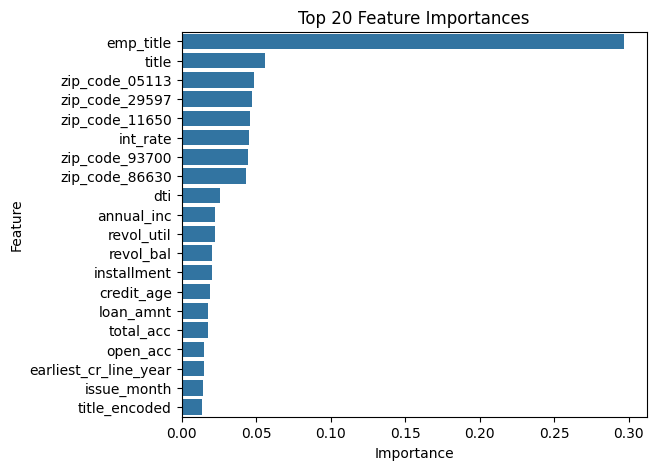

In [ ]:
top_n = 20
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(6, 5))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 20 Feature Importances')
plt.show()

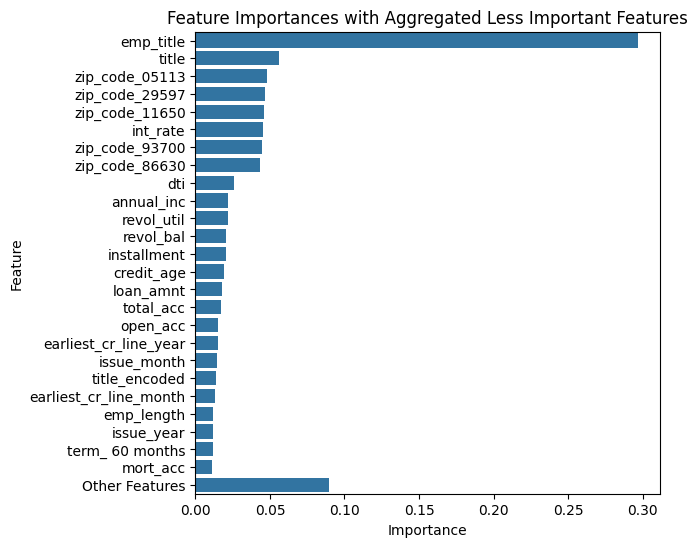

In [ ]:
#Notable features are separately shown clubbing unimportant features into a single category
threshold = 0.01
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]
less_important_features = feature_importance_df[feature_importance_df['Importance'] <= threshold]

# Combine less important features into one category
combined_df = pd.concat([
    important_features,
    pd.DataFrame({
        'Feature': ['Other Features'],
        'Importance': [less_important_features['Importance'].sum()]
    })
])

plt.figure(figsize=(6, 6))
sns.barplot(x='Importance', y='Feature', data=combined_df)
plt.title('Feature Importances with Aggregated Less Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Test Accuracy: 0.935501519245175
Confusion Matrix:
 [[94884   555]
 [ 7108 16262]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     95439
           1       0.97      0.70      0.81     23370

    accuracy                           0.94    118809
   macro avg       0.95      0.85      0.89    118809
weighted avg       0.94      0.94      0.93    118809



Results: Test Accuracy:93.56%

Confusion Matrix:
```
[[94786   653]
 [ 7025 16345]]
```

```

            0       0.93      0.99      0.96     95439
            1       0.96      0.70      0.81     23370

    accuracy                           0.94    118809
   macro avg       0.95      0.85      0.89    118809
weighted avg       0.94      0.94      0.93    118809
```

Accuracy:

The model achieved an accuracy of 93.56% on the test set, which is consistent with the cross-validation results. This high accuracy indicates that the model is performing very well.
  


Confusion matrix
```
True Positives (TP): 16,345 (correctly predicted positive cases)
True Negatives (TN): 94,786 (correctly predicted negative cases)
False Positives (FP): 653 (incorrectly predicted positive cases)
False Negatives (FN): 7,025 (incorrectly predicted negative cases)
```
Classification Report
```
Class 0 (Negative cases):
Precision: 0.93 (out of all predicted negative cases, 93% are true negatives)
Recall: 0.99 (out of all actual negative cases, 99% are correctly predicted)
F1-score: 0.96 (harmonic mean of precision and recall)
Class 1 (Positive cases):
Precision: 0.96 (out of all predicted positive cases, 96% are true positives)
Recall: 0.70 (out of all actual positive cases, 70% are correctly predicted)
F1-score: 0.81 (harmonic mean of precision and recall)
```



Summary The model performs very well with high accuracy and good recall for both classes. The precision for the positive class (1) is high, meaning when the model predicts a positive case, it's very likely to be correct. The recall for the positive class is slightly lower, indicating some positive cases are being missed (false negatives). This is common in imbalanced datasets, but it’s balanced with a high precision.

In [ ]:
# Prepare features and target
X = data.drop(columns=['loan_status'])  # Drop the target column from features
y = data['loan_status']

# Impute missing values in features
feature_imputer = SimpleImputer(strategy='most_frequent')
X_imputed = feature_imputer.fit_transform(X)

# Create DataFrame with imputed features
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Extracting the coefficients and feature names
coefficients = log_model.coef_[0]  # Coefficients for the features
feature_names = X.columns  # Feature names

# Create a DataFrame to display coefficients with feature names
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by the absolute value of the coefficient to see the most influential features
coeff_df['abs_coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='abs_coefficient', ascending=False)

# Display the coefficients
print(coeff_df.drop(columns=['abs_coefficient']))

                Feature  Coefficient
1              int_rate     0.258603
4            emp_length    -0.114249
12           revol_util     0.088178
19      term_ 60 months     0.075856
6   verification_status     0.070537
..                  ...          ...
80           credit_age     0.000007
61  home_ownership_NONE     0.000007
90        title_encoded     0.000002
69  purpose_educational    -0.000001
18     mort_acc_missing     0.000000

[93 rows x 2 columns]


In [ ]:
# Fit the model on your training data
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=2)

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Range of regularization strengths
    'penalty': ['l1', 'l2']  # L1 for Lasso, L2 for Ridge
}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [ ]:
logreg_model = LogisticRegression(solver='liblinear')


In [ ]:
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are your training data


Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'C': 100, 'penalty': 'l1'}
Best Cross-Validation Score: 0.9010933515137741


In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9004747115117542
Confusion Matrix:
 [[61921  1708]
 [ 6175  9402]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     63629
           1       0.85      0.60      0.70     15577

    accuracy                           0.90     79206
   macro avg       0.88      0.79      0.82     79206
weighted avg       0.90      0.90      0.89     79206



In [ ]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test ROC-AUC Score:", roc_auc)

Test ROC-AUC Score: 0.9517016783188122


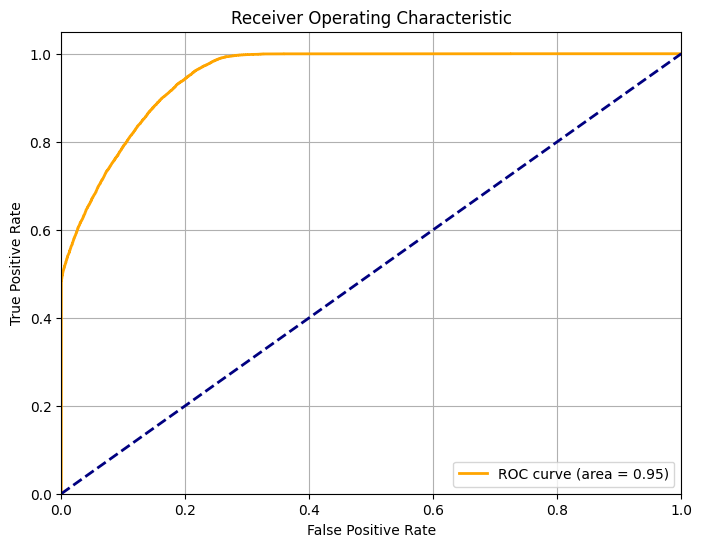

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()


A ROC-AUC score of 0.9517 indicates that the model is performing exceptionally well. This score suggests that the model has a high ability to distinguish between the positive class (e.g., loan defaults) and the negative class (e.g., non-defaults).

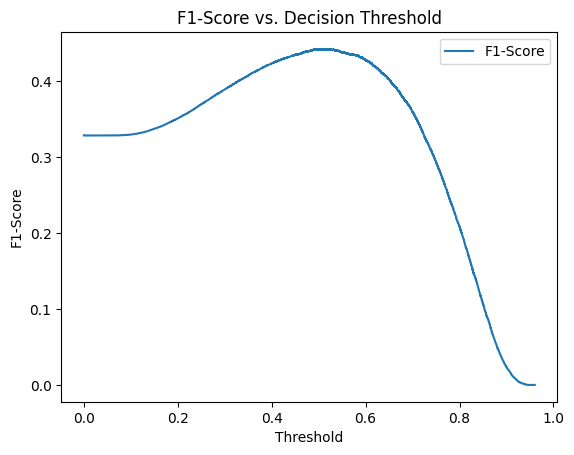

(0.494075102958065, 0.4428189066857247)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

# Assuming logreg is your trained logistic regression model
# and X_test, y_test are your test data

# Step 1: Generate predicted probabilities for the positive class
y_probs = logreg.predict_proba(X_test)[:, 1]

# Step 2: Evaluate Precision, Recall, and F1-Score at different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Step 3: Plot the F1-Score vs. Threshold
plt.plot(thresholds, f1_scores[:-1], label='F1-Score')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs. Decision Threshold')
plt.legend()
plt.show()

# Step 4: Find the threshold with the maximum F1-Score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

optimal_threshold, optimal_f1


Here the peak represents a balanced approach.The F1-Score peaks around a threshold between 0.5 and 0.6. This suggests that at this threshold, the model achieves the best balance between Precision and Recall.